<a href="https://colab.research.google.com/github/Aayush-05/Sentiment-Analysis-Lockheed-Martin-/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install nltk
!pip install vaderSentiment
!pip install requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests

#start and end dates
start_date = "2025-04-20"
end_date = datetime.now().strftime('%Y-%m-%d')

lmt_stock = yf.Ticker("LMT")
stock_data = lmt_stock.history(start=start_date, end=end_date)
stock_data.reset_index(inplace=True)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-04-21 00:00:00-04:00,459.260010,463.230011,452.790009,458.329987,1532900,0.0,0.0
1,2025-04-22 00:00:00-04:00,458.049988,470.769989,442.350006,462.079987,2878000,0.0,0.0
2,2025-04-23 00:00:00-04:00,467.000000,471.390015,457.649994,463.549988,1352700,0.0,0.0
3,2025-04-24 00:00:00-04:00,465.769989,467.589996,460.160004,466.809998,1105000,0.0,0.0
4,2025-04-25 00:00:00-04:00,469.989990,478.459991,467.899994,477.640015,1521700,0.0,0.0


In [ ]:
api_key = '#yourapikey'
url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'LMT',
    'apiKey': api_key,
    'language': 'en',
    'sortBy': 'publishedAt',
    'from': start_date,
    'to': end_date
}
response = requests.get(url, params=params)
data = response.json()
if data['status'] == 'ok':
    articles = data['articles']
else:
    print(f"Error: {data['message']}")
articles = data['articles']

data = pd.DataFrame(articles)
data = data[['publishedAt', 'title']]
data.columns = ['date', 'headline']

In [ ]:
data

,date,headline
0,2025-05-16T05:56:45Z,Brokers Issue Forecasts for Lockheed Martin Q2...
1,2025-05-15T21:10:15Z,$100 Invested In Lockheed Martin 20 Years Ago ...
2,2025-05-15T13:30:00Z,Is the Southern accent fixin' to disappear in ...
3,2025-05-15T13:30:00Z,Is the Southern accent fixin' to disappear in ...
4,2025-05-15T06:04:50Z,Best Defense Stocks To Watch Today – May 13th
5,2025-05-12T07:43:34Z,High-Quality Dividend Growth Stocks Near 52-We...
6,2025-05-09T14:27:56Z,There is no shortage of essential commodities ...
7,2025-05-08T17:57:12Z,"Boeing, Defense Stocks Take Off, But No Thanks..."
8,2025-05-08T06:34:43Z,Defense Stocks To Add to Your Watchlist – May 6th
9,2025-05-06T06:08:56Z,Top Defense Stocks To Watch Now – May 4th


In [ ]:
# Preprocess news headlines
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

data['cleaned_headline'] = data['headline'].apply(preprocess_text)

# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

data['sentiment_score'] = data['cleaned_headline'].apply(get_sentiment_score)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
data

,date,headline,cleaned_headline,sentiment_score
0,2025-05-16T05:56:45Z,Brokers Issue Forecasts for Lockheed Martin Q2...,Brokers Issue Forecasts Lockheed Martin Earnings,0.0000
1,2025-05-15T21:10:15Z,$100 Invested In Lockheed Martin 20 Years Ago ...,Invested Lockheed Martin Years Ago Would Worth...,0.2263
2,2025-05-15T13:30:00Z,Is the Southern accent fixin' to disappear in ...,Southern accent fixin disappear parts US South,-0.2263
3,2025-05-15T13:30:00Z,Is the Southern accent fixin' to disappear in ...,Southern accent fixin disappear parts US South,-0.2263
4,2025-05-15T06:04:50Z,Best Defense Stocks To Watch Today – May 13th,Best Defense Stocks Watch Today May,0.6908
5,2025-05-12T07:43:34Z,High-Quality Dividend Growth Stocks Near 52-We...,Dividend Growth Stocks Near Lows Alphabet Asto...,0.5574
6,2025-05-09T14:27:56Z,There is no shortage of essential commodities ...,shortage essential commodities country Centre,-0.2500
7,2025-05-08T17:57:12Z,"Boeing, Defense Stocks Take Off, But No Thanks...",Boeing Defense Stocks Take Thanks Industry Gia...,0.5267
8,2025-05-08T06:34:43Z,Defense Stocks To Add to Your Watchlist – May 6th,Defense Stocks Add Watchlist May,0.1280
9,2025-05-06T06:08:56Z,Top Defense Stocks To Watch Now – May 4th,Top Defense Stocks Watch May,0.3182


from matplotlib import pyplot as plt
data['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sentiment_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

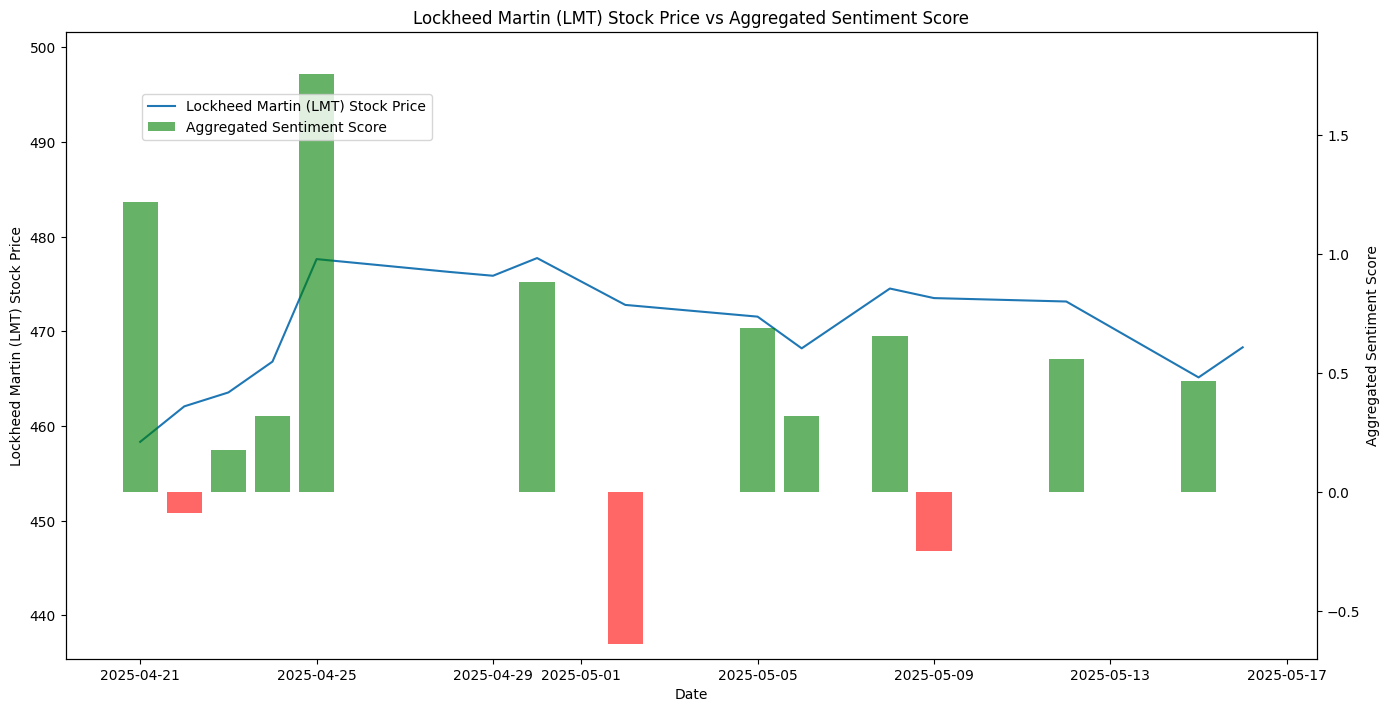

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

data['sentiment_score'] = data['cleaned_headline'].apply(get_sentiment_score)

# Convert dates to datetime format
data['date'] = pd.to_datetime(data['date']).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Aggregate sentiment scores by date
aggregated_sentiment = data.groupby('date')['sentiment_score'].sum().reset_index()

# Merge stock data with aggregated sentiment scores
combined_data = pd.merge(stock_data, aggregated_sentiment, left_on='Date', right_on='date', how='inner')

# Visualize the data with a secondary y-axis and bar plot for aggregated sentiment scores
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Lockheed Martin (LMT) Stock Price')
ax1.plot(combined_data['Date'], combined_data['Close'], label='Lockheed Martin (LMT) Stock Price')
ax1.tick_params(axis='y')
ax1.set_ylim(combined_data['Close'].min() * 0.95, combined_data['Close'].max() * 1.05)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Aggregated Sentiment Score')

# Use different colors for positive and negative bar values
colors = ['green' if val >= 0 else 'red' for val in combined_data['sentiment_score']]
ax2.bar(combined_data['Date'], combined_data['sentiment_score'], label='Aggregated Sentiment Score', color=colors, alpha=0.6)
ax2.tick_params(axis='y')
ax2.set_ylim(combined_data['sentiment_score'].min() * 1.1, combined_data['sentiment_score'].max() * 1.1)

fig.tight_layout()
plt.title('Lockheed Martin (LMT) Stock Price vs Aggregated Sentiment Score')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()